<a href="https://colab.research.google.com/github/hysakada/IA-FER/blob/master/Analise_Emocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

from keras.regularizers import l2
from keras.utils import np_utils


df=pd.read_csv('drive/My Drive/TCC IA/fer2013.csv')


X_train_Pixels,X_train_Labels,Y_test_Pixels,Y_test_Labels=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train_Pixels.append(np.array(val,'float32'))
           X_train_Labels.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           Y_test_Pixels.append(np.array(val,'float32'))
           Y_test_Labels.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:




num_labels = 7
#batch_size = 64
epochs = 15
width, height = 48, 48


X_train_Pixels = np.array(X_train_Pixels,'float32')
X_train_Labels = np.array(X_train_Labels,'float32')
Y_test_Pixels = np.array(Y_test_Pixels,'float32')
Y_test_Labels = np.array(Y_test_Labels,'float32')

X_train_Labels=np_utils.to_categorical(X_train_Labels, num_classes=num_labels)
Y_test_Labels=np_utils.to_categorical(Y_test_Labels, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train_Pixels -= np.mean(X_train_Pixels, axis=0)
X_train_Pixels /= np.std(X_train_Pixels, axis=0)

Y_test_Pixels -= np.mean(Y_test_Pixels, axis=0)
Y_test_Pixels /= np.std(Y_test_Pixels, axis=0)


# parametros 1°- quantidade de imagens, 2° e 3° é o tamanho da imagem e 4° se a imagem está em cinza(1 é sim)

X_train_Pixels = X_train_Pixels.reshape(X_train_Pixels.shape[0], width, height, 1) 

Y_test_Pixels = Y_test_Pixels.reshape(Y_test_Pixels.shape[0], width, height, 1)


#criando a rede neural

#primeira camada
model = Sequential()

#autokeras instalar gerador de modelo CNN
#clipper 

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(X_train_Pixels.shape[1:])))
model.add(Conv2D(64,kernel_size= (5, 5), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))



#segunda camada
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
#model.add(Dropout(0.7))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))



#terceira camada
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))




model.add(Flatten())

#conectando as camadas

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8))



model.add(Dense(num_labels, activation='softmax'))

# model.summary()


#compilando o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

#treinando o modelo
history=model.fit(X_train_Pixels, X_train_Labels,
          validation_data=(Y_test_Pixels, Y_test_Labels),
          epochs=epochs,
          shuffle=True)


#salvando o modelo para usar depois
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)

model.save_weights("ferPesos.h5")





Epoch 1/15
898/898 [==============================] - 14s 15ms/step - loss: 1.9609 - accuracy: 0.2545 - val_loss: 1.9898 - val_accuracy: 0.2549
Epoch 2/15
898/898 [==============================] - 14s 15ms/step - loss: 1.5922 - accuracy: 0.3793 - val_loss: 1.7823 - val_accuracy: 0.3034
Epoch 3/15
898/898 [==============================] - 14s 15ms/step - loss: 1.4409 - accuracy: 0.4437 - val_loss: 1.5544 - val_accuracy: 0.3619
Epoch 4/15
898/898 [==============================] - 14s 15ms/step - loss: 1.3395 - accuracy: 0.4862 - val_loss: 1.4035 - val_accuracy: 0.4600
Epoch 5/15
898/898 [==============================] - 14s 15ms/step - loss: 1.2728 - accuracy: 0.5183 - val_loss: 1.3664 - val_accuracy: 0.4753
Epoch 6/15
898/898 [==============================] - 14s 15ms/step - loss: 1.2121 - accuracy: 0.5427 - val_loss: 1.2962 - val_accuracy: 0.5113
Epoch 7/15
898/898 [==============================] - 14s 15ms/step - loss: 1.1804 - accuracy: 0.5554 - val_loss: 1.2327 - val_accuracy:

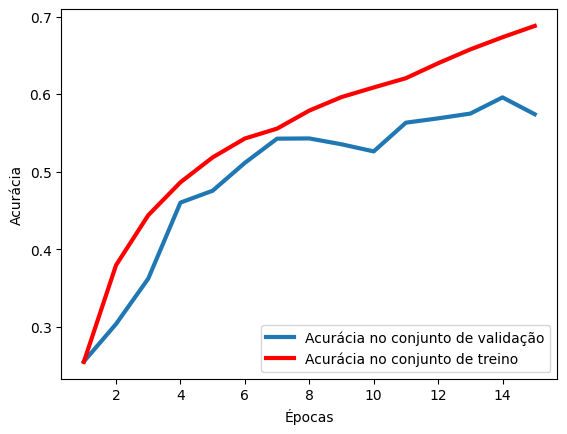

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=3.0)
plt.setp(accuracy_train, linewidth=3.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

In [ ]:
adivinhar=model.predict(Y_test_Pixels)
#print(y_pred)


from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

pred_list = []; actual_list = [] ; 
ind=0
for i in adivinhar:
 
  pred_list.append(np.argmax(i))
  
for i in Y_test_Labels:
 
  actual_list.append(np.argmax(i))


matriz_plotagem=confusion_matrix(actual_list, pred_list)




In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
      
    #   print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Verídico')
    plt.xlabel('Predição')
    plt.tight_layout()


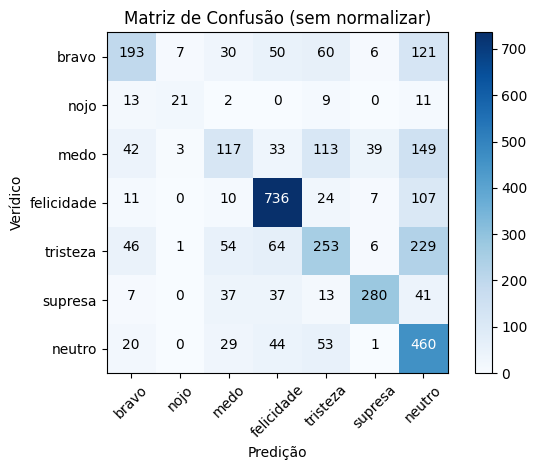

Totais do DataSet de Teste:
Bravo: 467  Nojo: 56  Medo: 496  Felicidade: 895  Tristeza: 653  Surpresa: 415  Neutro: 607

Totais do DataSet de Treino:
Bravo: 3995  Nojo: 436  Medo: 4097  Felicidade: 7215  Tristeza: 4830  Surpresa: 3171  Neutro: 4965


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

emocoes=["bravo", "nojo", "medo", "felicidade", "tristeza", "supresa", "neutro"]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_plotagem, classes=emocoes,
                      title='Matriz de Confusão (sem normalizar)')
plt.show()

#verificar total de cada emoção
dfTest=df.copy()
dfTraining=df.copy()
dfTest=dfTest.drop(dfTest[dfTest['Usage']!='PublicTest' ].index)

emotions=dfTest['emotion']



bravoTest = (emotions == 0).sum()
nojoTest = (emotions == 1).sum()
medoTest = (emotions == 2).sum()
felicidadeTest = (emotions == 3).sum()
tristezaTest = (emotions == 4).sum()
surpresaTest = (emotions == 5).sum()
neutroTest = (emotions == 6).sum()

print("Totais do DataSet de Teste:")
print("Bravo:",bravoTest, " Nojo:",nojoTest, " Medo:",medoTest, " Felicidade:",felicidadeTest, " Tristeza:",tristezaTest, " Surpresa:",surpresaTest, " Neutro:",neutroTest)
      

dfTraining=dfTraining.drop(dfTraining[dfTraining['Usage']!='Training' ].index)

emotions=dfTraining['emotion']



bravoTraining = (emotions == 0).sum()
nojoTraining = (emotions == 1).sum()
medoTraining = (emotions == 2).sum()
felicidadeTraining = (emotions == 3).sum()
tristezaTraining = (emotions == 4).sum()
surpresaTraining = (emotions == 5).sum()
neutroTraining = (emotions == 6).sum()

print("\nTotais do DataSet de Treino:")
print("Bravo:",bravoTraining, " Nojo:",nojoTraining, " Medo:",medoTraining, " Felicidade:",felicidadeTraining, " Tristeza:",tristezaTraining, " Surpresa:",surpresaTraining, " Neutro:",neutroTraining)      

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Resultado da expressão: medo
[[0.04 0.   0.36 0.13 0.07 0.33 0.07]]
2


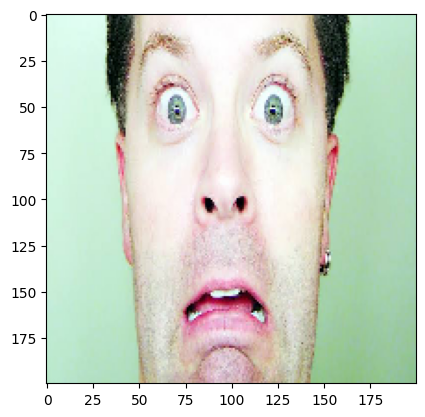

In [ ]:
from keras.preprocessing import image
from skimage import io



#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

img = image.load_img('drive/My Drive/TCC IA/surpresa2.jpeg', color_mode="grayscale", target_size=(48, 48))
img = image.load_img('drive/My Drive/TCC IA/surpresa2.jpeg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('drive/My Drive/TCC IA/surpresa2.jpeg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)


#x = np.array(x, 'float32')
#x = x.reshape([48, 48]);

x /= 255  

resultado = model.predict(x)


plt.imshow(show_img)


        
print('Resultado da expressão:',emocoes[np.argmax(resultado)])
print(resultado)
print(np.argmax(resultado))

In [ ]:
# caso não evolua em 5 epocas para
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# salva melhor peso
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model




modelHist = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size,
            callbacks=[es,mc])
            callbacks=[es,mc]

#pegar o maior valor do array 